In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
%time datos = pd.read_csv('data_equilibrada.csv')

Wall time: 14.3 ms


In [ ]:
datos.shape

(1479, 3)

In [ ]:
%time datos.tokens=datos.tokens.apply(literal_eval)

Wall time: 96.8 ms


In [ ]:
bow = pd.read_csv('bow.csv')

In [ ]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

Wall time: 47.9 ms


In [ ]:
tfidf

,stop,unsubscrib,verifi,inform,request,thank,address,lafargeholcim,benefit,com,...,chart,brotherhood,tanker,driver,vous,webmanag,theworknumb,ppay,tci,usf
0,0.000000,0.000000,0.093465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062238,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.126601,0.000000,0.093610,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.070336,0.071192,0.000000,0.000000,0.000000,0.084040,0.000000,0.099912,0.119191,0.114623,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,0.084983,0.086018,0.000000,0.000000,0.000000,0.101541,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1476,0.019315,0.019551,0.000000,0.000000,0.000000,0.000000,0.000000,0.082313,0.000000,0.031478,...,0.0,0.0,0.0,0.0,0.447812,0.0,0.0,0.0,0.0,0.0
1477,0.107704,0.109015,0.000000,0.000000,0.000000,0.128688,0.000000,0.000000,0.000000,0.175520,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
# l1_ratios=[i/10 for i in range(0,11)]
l1_ratios=np.arange(0,1.05,0.05)
for l1_ratio in l1_ratios:
    print("l1_ratio:",l1_ratio)
    logreg = LogisticRegression(l1_ratio=l1_ratio,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
    logreg.fit(X_train, y_train)

    predicciones_train=logreg.predict(X_train)
    predicciones_test=logreg.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

l1_ratio: 0.0
Train:
[[119   8   2   3   7   3   7]
 [  3 225   0   1   2   0   0]
 [  0   1 179   1   0   0   0]
 [  3   4   0 162   0   2   2]
 [  7   3   0   1 147   1   1]
 [  0   0   2   0   1 141   3]
 [ 11   1   0   1   2  14 113]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       149
           1       0.93      0.97      0.95       231
           2       0.98      0.99      0.98       181
           3       0.96      0.94      0.95       173
           4       0.92      0.92      0.92       160
           5       0.88      0.96      0.92       147
           6       0.90      0.80      0.84       142

    accuracy                           0.92      1183
   macro avg       0.91      0.91      0.91      1183
weighted avg       0.92      0.92      0.92      1183

Test:
[[22  4  3  2  3  1  2]
 [ 1 52  0  0  0  0  1]
 [ 0  0 41  0  0  0  0]
 [ 2  1  0 33  0  0  0]
 [ 2  0  0  0 33  0  4]
 [ 0  1  0  0  1 48  1]
 [ 4  1  0  1 

C:\Users\santi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


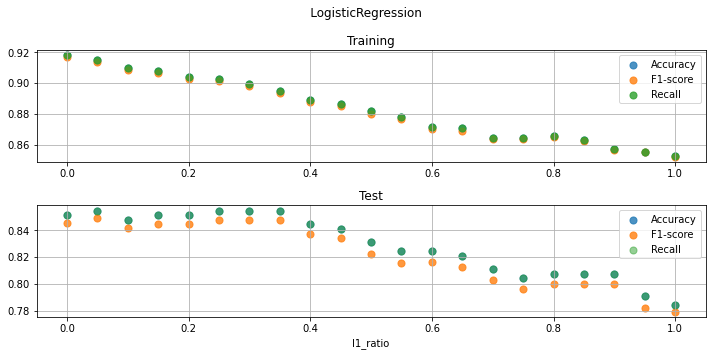

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     LogisticRegression")

ax[0].scatter(l1_ratios,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(l1_ratios,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(l1_ratios,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(l1_ratios,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(l1_ratios,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(l1_ratios,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('l1_ratio')

plt.show()

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
# l1_ratios=[i/10 for i in range(0,11)]
Cs=np.arange(1,11)
for C in Cs:
    print("C:",C)
    logreg = LogisticRegression(C=C,l1_ratio=0.3,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
    logreg.fit(X_train, y_train)

    predicciones_train=logreg.predict(X_train)
    predicciones_test=logreg.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))

    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

C: 1
Train:
[[110  12   2   4   8   5   8]
 [  3 224   0   1   3   0   0]
 [  0   2 176   1   0   2   0]
 [  3   4   0 162   0   2   2]
 [  9   6   0   1 140   3   1]
 [  0   0   3   0   1 140   3]
 [ 12   4   0   1   2  11 112]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       149
           1       0.89      0.97      0.93       231
           2       0.97      0.97      0.97       181
           3       0.95      0.94      0.94       173
           4       0.91      0.88      0.89       160
           5       0.86      0.95      0.90       147
           6       0.89      0.79      0.84       142

    accuracy                           0.90      1183
   macro avg       0.90      0.89      0.89      1183
weighted avg       0.90      0.90      0.90      1183

Test:
[[21  4  4  2  3  1  2]
 [ 0 52  0  0  1  0  1]
 [ 0  0 41  0  0  0  0]
 [ 2  2  0 32  0  0  0]
 [ 1  0  0  0 35  0  3]
 [ 0  0  0  0  1 49  1]
 [ 4  2  0  1  3  5 23]

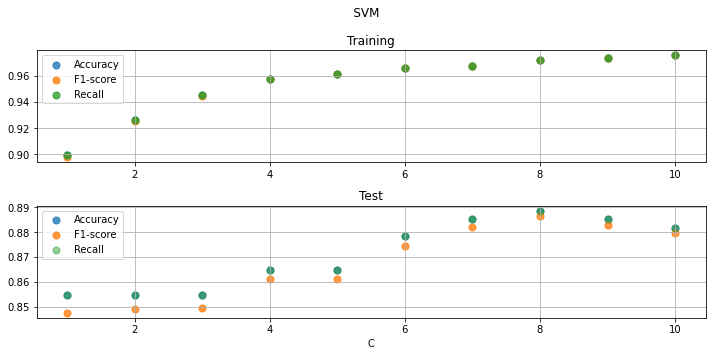

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     SVM")

ax[0].scatter(Cs,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(Cs,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(Cs,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Training')

ax[1].scatter(Cs,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(Cs,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(Cs,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('C')

plt.show()

In [ ]:
cms_train=[]
cms_test=[]
scores_train = []
scores_test = []
knn = LogisticRegression(penalty='none',max_iter=12000,solver='saga',multi_class='multinomial',n_jobs=-1)
knn.fit(X_train, y_train)

predicciones_train=knn.predict(X_train)
predicciones_test=knn.predict(X_test)

print("Train:")
print(confusion_matrix(y_train,predicciones_train))
print(classification_report(y_train,predicciones_train))

print("Test:")
print(confusion_matrix(y_test,predicciones_test))
print(classification_report(y_test,predicciones_test))

Train:
[[139   0   0   0   5   0   5]
 [  2 229   0   0   0   0   0]
 [  0   0 181   0   0   0   0]
 [  0   0   0 173   0   0   0]
 [  3   0   0   0 156   0   1]
 [  0   0   0   0   0 147   0]
 [  3   0   0   0   0   0 139]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       149
           1       1.00      0.99      1.00       231
           2       1.00      1.00      1.00       181
           3       1.00      1.00      1.00       173
           4       0.97      0.97      0.97       160
           5       1.00      1.00      1.00       147
           6       0.96      0.98      0.97       142

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

Test:
[[21  2  0  1  5  4  4]
 [ 1 47  1  1  2  1  1]
 [ 0  0 41  0  0  0  0]
 [ 0  0  0 35  0  0  1]
 [ 2  0  0  0 34  0  3]
 [ 1  0  0  0  0 47  3]
 [ 1  1  0  0  3  1 32]]
   

C:\Users\santi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
